## Assignment

Import necessary library

In [3]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Read the data

In [4]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [5]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [6]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [7]:
df_can['Total'] = df_can.sum(axis=1)

**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [8]:
### type your answer here
for i in range(len(df_can.index)):
    if df_can.iloc[int(i)]['Country'] == "China":
        df_chin = df_can.iloc[int(i)]
        df_chin.drop(['Country','Continent','Region','DevName','Total'], inplace=True)
    elif df_can.iloc[int(i)]['Country'] == "India":
        df_india = df_can.iloc[int(i)]
        df_india.drop(['Country','Continent','Region','DevName','Total'], inplace=True)
df_india

1980     8880
1981     8670
1982     8147
1983     7338
1984     5704
1985     4211
1986     7150
1987    10189
1988    11522
1989    10343
1990    12041
1991    13734
1992    13673
1993    21496
1994    18620
1995    18489
1996    23859
1997    22268
1998    17241
1999    18974
2000    28572
2001    31223
2002    31889
2003    27155
2004    28235
2005    36210
2006    33848
2007    28742
2008    28261
2009    29456
2010    34235
2011    27509
2012    30933
2013    33087
Name: 79, dtype: object

In [9]:
df_chin

1980     5123
1981     6682
1982     3308
1983     1863
1984     1527
1985     1816
1986     1960
1987     2643
1988     2758
1989     4323
1990     8076
1991    14255
1992    10846
1993     9817
1994    13128
1995    14398
1996    19415
1997    20475
1998    21049
1999    30069
2000    35529
2001    36434
2002    31961
2003    36439
2004    36619
2005    42584
2006    33518
2007    27642
2008    30037
2009    29622
2010    30391
2011    28502
2012    33024
2013    34129
Name: 36, dtype: object

Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

In [10]:
### type your answer here
ax = df_chin.T.plot(kind='line', label='China')
ax.legend(loc='upper left', frameon=False)

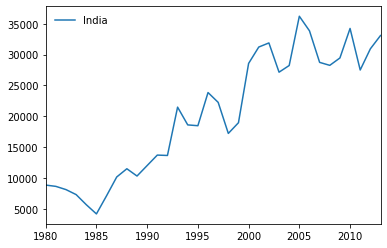

In [11]:
ax = df_india.T.plot(kind='line', label='India')
ax.legend(loc='upper left', frameon=False)

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

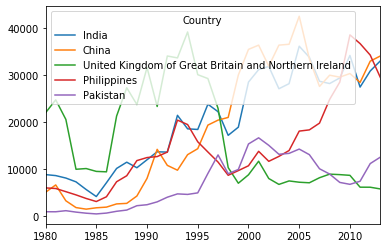

In [20]:
### type your answer here
df_top = df_can.nlargest(5,'Total')
df_top.drop(['Continent','Region','DevName','Total'], axis=1,inplace=True)
df_top = df_top.transpose()
df_top.columns = df_top.iloc[0]
df_top = df_top.iloc[1:]
df_top.plot()
# df_top

**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

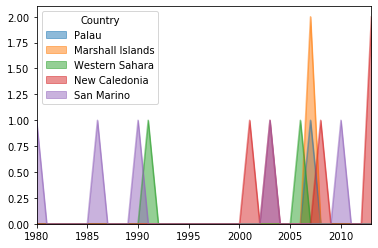

In [13]:
### type your answer here
df_low = df_can.nsmallest(5,'Total')
df_low.drop(['Continent','Region','DevName','Total'], axis=1,inplace=True)
df_low = df_low.transpose()
df_low.columns = df_low.iloc[0]
df_low = df_low.iloc[1:]
df_low.plot.area(stacked=False).set_alpha(0.55)




**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

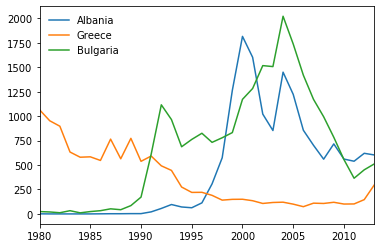

In [14]:
### type your answer here
for i in range(len(df_can.index)):
    if df_can.iloc[int(i)]['Country'] == "Greece":
        df_greec = df_can.iloc[int(i)]
        df_greec.drop(['Country','Continent','Region','DevName','Total'], inplace=True)
    elif df_can.iloc[int(i)]['Country'] == "Albania":
        df_alb = df_can.iloc[int(i)]
        df_alb.drop(['Country','Continent','Region','DevName','Total'], inplace=True)
    elif df_can.iloc[int(i)]['Country'] == "Bulgaria":
        df_bulg = df_can.iloc[int(i)]
        df_bulg.drop(['Country','Continent','Region','DevName','Total'], inplace=True)

ax = df_alb.plot(label='Albania')
df_greec.plot(ax=ax, label='Greece')
df_bulg.plot(ax=ax, label='Bulgaria')
ax.legend(loc='upper left', frameon=False)


**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [15]:
### type your answer here
df_fift = df_can.nlargest(15,'Total')
df_fift = df_fift[['Country','Total']]
df_fift = df_fift.transpose()
df_fift.columns = df_fift.iloc[0]
df_fift = df_fift.iloc[1:]
df_fift


Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,Poland,Lebanon,France,Jamaica,Viet Nam,Romania
Total,691904,659962,551500,511391,241600,241122,175923,148358,142581,139241,115359,109091,106431,97146,93585


Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
   3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

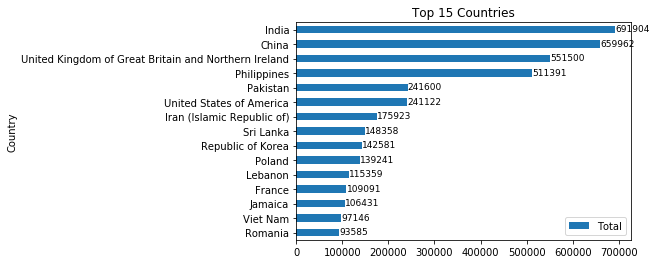

In [16]:
### type your answer here
ax = df_fift.T.plot(kind='barh', title='Top 15 Countries')

# ngeset individual bar lables dari list
for i in ax.patches:
    # get_width nge kiri in atau nge kananin; get_y nge naik turun
    ax.text(i.get_width()+.3, i.get_y()+.38, i.get_width(), fontsize=9, color='black')

# nampilkan terbesar yang diatas 
ax.invert_yaxis()



# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).